# Regresión lineal

Modelo que asume una relación lineal entre la variable independiente (X) y la variable dependiente (Y).

Ecuación:
$$ Y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n = \Theta X $$

Donde:
- $Y$: Variable dependiente.
- $X$: Variable independiente.
- $\theta_0$: Intercepto.
- $\theta_n$: Coeficiente $n$-ésimo de la pendiente.


<img src="../imgs/linear_regression.png">

Sí, se ve un poco complicada... Bueno, un mucho, pero este vídeo nos ayudará:

<img src="../imgs/fit_linear_regression.gif" style="width: 100%;">

### Cargamos los datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
data = pd.read_csv(url)
print(data.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [2]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  392.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.491160   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.00000

### Limpieza de datos

In [3]:
# Revisamos por valores nulos
print(data.isnull().sum())

# Reemplazamos los valores nulos de la columna 'horsepower' por la media
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())
print(data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


## Regresión lineal una variable

### Visualización

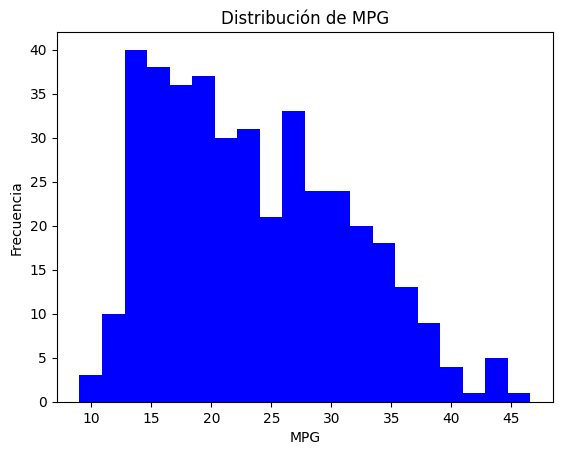

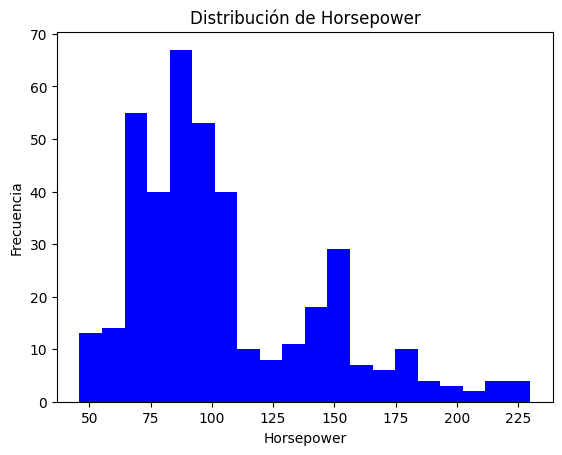

In [4]:
# graficamos la distribución de las columnas 'mpg' y 'horsepower'
plt.hist(data['mpg'], bins=20, color='blue')
plt.xlabel('MPG')
plt.ylabel('Frecuencia')
plt.title('Distribución de MPG')
plt.show()

plt.hist(data['horsepower'], bins=20, color='blue')
plt.xlabel('Horsepower')
plt.ylabel('Frecuencia')
plt.title('Distribución de Horsepower')
plt.show()

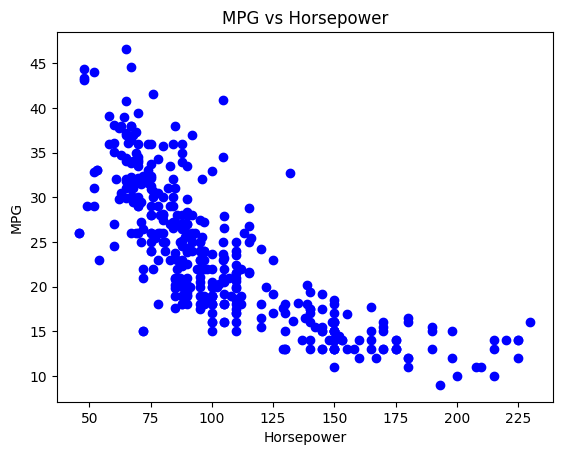

In [5]:
# Graficamos la relación entre las columnas 'mpg' y 'horsepower'
plt.scatter(data['horsepower'], data['mpg'], color='blue')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower')
plt.show()

### Partición del dataset

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Seleccionamos las columnas 'horsepower' y 'mpg'
X = data[['horsepower']].dropna()
y = data['mpg'].dropna()

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(318, 1)
(80, 1)
(318,)
(80,)


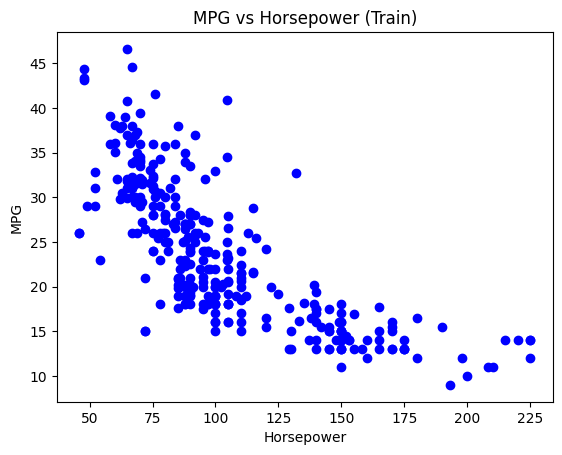

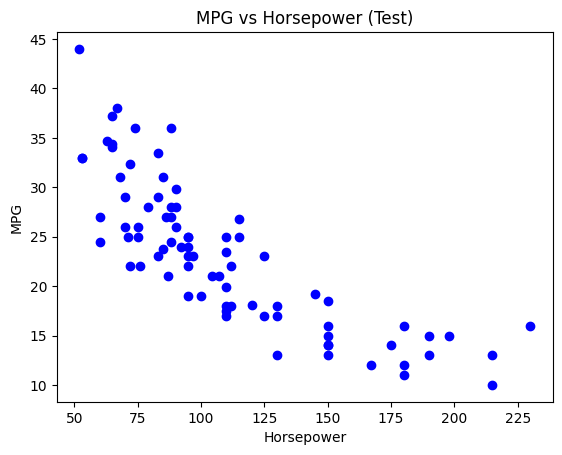

In [7]:
# Vemos las particiones
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Graficamos los datos de train
plt.scatter(X_train, y_train, color='blue')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower (Train)')
plt.show()

# Graficamos los datos de test
plt.scatter(X_test, y_test, color='blue')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower (Test)')
plt.show()

### Entrenamiento del modelo

In [8]:
# Creamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

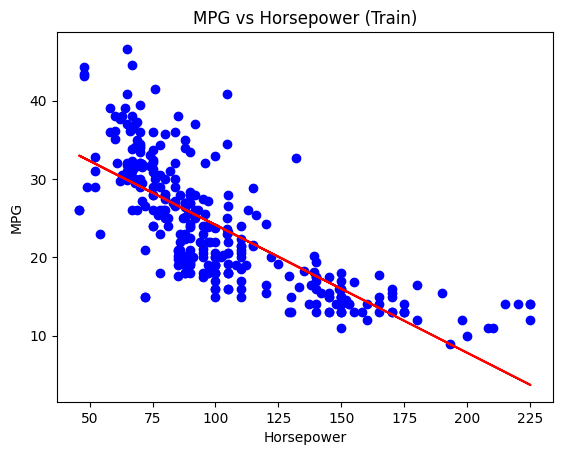

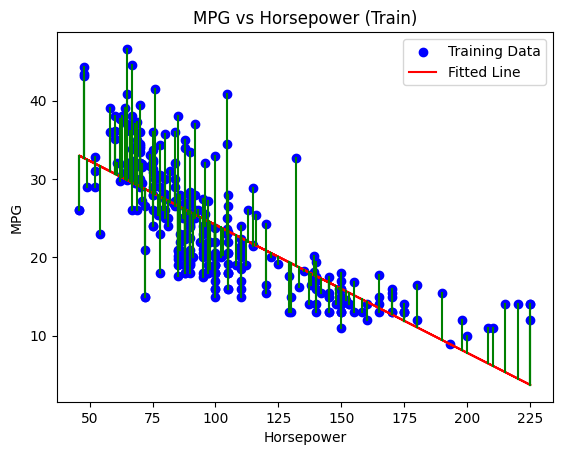

In [9]:
# Mostramos los resultados para train
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower (Train)')
plt.show()

# Agregamos los resultados con los errores en train
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Fitted Line')

# Calcular la diferencia entre los valores reales y las predicciones
for i in range(len(y_train)):
    plt.plot([X_train.iloc[i, 0], X_train.iloc[i, 0]], 
             [y_train.iloc[i], model.predict(X_train.iloc[[i]])[0]], 
             color='green')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower (Train)')
plt.legend()
plt.show()

### Análisis en set de test

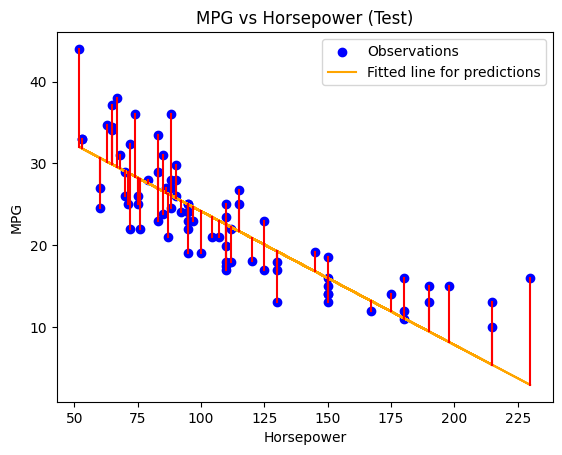

In [10]:
# Volvemos a hacer las predicciones ahora para test
# Obtenemos las predicciones
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Observations')
plt.plot(X_test, y_pred, color='orange', label='Fitted line for predictions')
# graficamos los errores
for i in range(len(X_test)):
    plt.plot([X_test.iloc[i], X_test.iloc[i]], [y_test.iloc[i], y_pred[i]], color='red')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower (Test)')
plt.legend()
plt.show()

## Métricas de rendimiento

## Métricas de Evaluación para la Regresión Lineal

Para determinar la eficacia de un modelo de regresión lineal, se utilizan diversas métricas de evaluación. Estas métricas indican cuán bien el modelo predice los valores observados.

### Error Cuadrático Medio (MSE)
El **MSE** calcula el promedio de las diferencias al cuadrado entre los valores reales y los valores predichos. Se utiliza la diferencia al cuadrado para evitar que las diferencias negativas y positivas se cancelen entre sí.


$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

- $n$ es el número de puntos de datos.
- $y_i$ es el valor real del punto de datos $i$.
- $\hat{y}_i$ es el valor predicho del punto de datos $i$.

### Error Absoluto Medio (MAE)
El **MAE** mide el promedio de las diferencias absolutas entre los valores predichos y los valores reales.

$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i| $

- $ n $ es el número de observaciones.
- $ Y_i $ representa los valores reales.
- $ \hat{Y}_i $ representa los valores predichos.

### Raíz del Error Cuadrático Medio (RMSE)
El **RMSE** es la raíz cuadrada de la varianza de los residuos. Indica qué tan bien los puntos de datos observados coinciden con los valores esperados.

$ \text{RMSE} = \sqrt{\frac{RSS}{n}} = \sqrt{\frac{\sum_{i=2}^{n} (y_{i,\text{actual}} - y_{i,\text{predicho}})^2}{n}} $

Para obtener una estimación imparcial, se divide la suma de los residuos al cuadrado por el número de grados de libertad:

$ \text{RMSE} = \sqrt{\frac{RSS}{n-2}} = \sqrt{\frac{\sum_{i=2}^{n} (y_{i,\text{actual}} - y_{i,\text{predicho}})^2}{n-2}} $

### Coeficiente de Determinación (R-squared)
El **R-squared** indica la proporción de la variación que el modelo puede explicar o capturar. Está en el rango de 0 a 1.

$ R^2 = 1 - \left( \frac{RSS}{TSS} \right) $

- **RSS**: Suma de los cuadrados residuales.
- **TSS**: Suma total de los cuadrados.

<img src="../imgs/r_squared.jpg" style="max-width: 80%;">

### R-cuadrado Ajustado
El **R-cuadrado Ajustado** mide la proporción de la varianza explicada por las variables independientes, penalizando los predictores irrelevantes.

$ \text{Ajustado } R^2 = 1 - \left( \frac{(1-R^2) \cdot (n-1)}{n-k-1} \right) $

- $ n $ es el número de observaciones.
- $ k $ es el número de predictores en el modelo.
- $ R^2 $ es el coeficiente de determinación.

Estas métricas ayudan a evaluar y mejorar los modelos de regresión lineal, asegurando su precisión y relevancia en la predicción de datos.

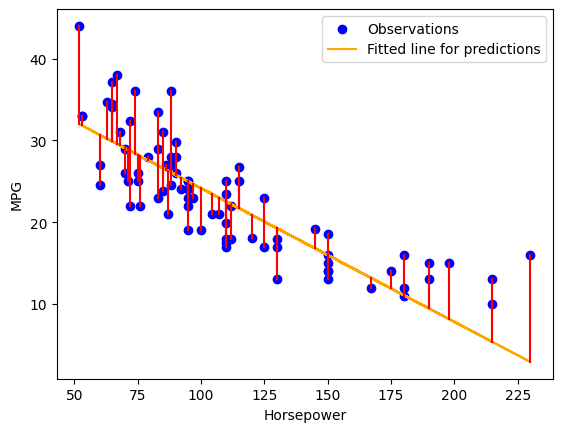

In [11]:
# Volvemos a hacer las predicciones
plt.scatter(X_test, y_test, color='blue', label='Observations')
plt.plot(X_test, y_pred, color='orange', label='Fitted line for predictions')
# graficamos los errores
for i in range(len(X_test)):
    plt.plot([X_test.iloc[i], X_test.iloc[i]], [y_test.iloc[i], y_pred[i]], color='red')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# Calcula el MAE (Mean Absolute Error) del modelo   
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Calcula el MSE (Mean Squared Error) del modelo
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Calcula el RMSE (Root Mean Squared Error) del modelo
rmse = root_mean_squared_error(y_test, y_pred)
print(f'RMSE: {rmse}')

# Calcula el R2 del modelo
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

# Calcula el R2 ajustado del modelo
n = X_test.shape[0]
p = X_test.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'R2 ajustado: {r2_adj}')

MAE: 3.4834646156800146
MSE: 19.151211313552405
RMSE: 4.37620969716402
R2: 0.6438073642623536
R2 ajustado: 0.6392407920093068


In [13]:
# Comparamos el MAE y RMSE contra el valor promedio de 'mpg'
mpg_mean = data['mpg'].mean()
print(f'MPG mean: {mpg_mean}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}', end="\n\n")
# Vemos qué tan buenos son los errores en comparación con el promedio de 'mpg'
mae_ratio = mae / mpg_mean
rmse_ratio = rmse / mpg_mean
print(f'MAE ratio: {mae_ratio}')
print(f'RMSE ratio: {rmse_ratio}', end="\n\n")
# Indicamos el porcentaje de error (en promedio) que tiene el modelo
print(f'Error MAE: {mae_ratio * 100:.2f}%')
print(f'Error RMSE: {rmse_ratio * 100:.2f}%')

MPG mean: 23.514572864321607
MAE: 3.4834646156800146
RMSE: 4.37620969716402

MAE ratio: 0.14814067156479954
RMSE ratio: 0.186106280663256

Error MAE: 14.81%
Error RMSE: 18.61%


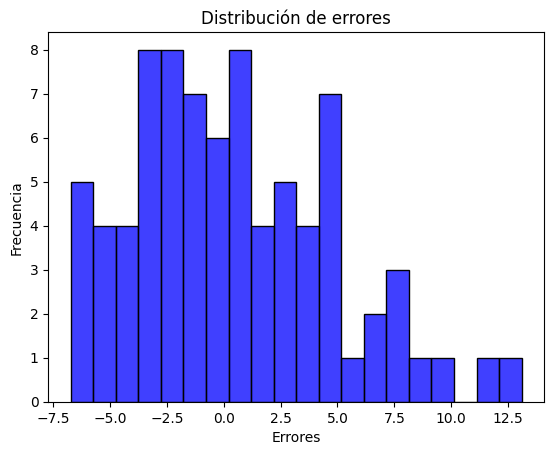

In [14]:
# Graficamos la distribución de los errores
errors = y_test - y_pred
sns.histplot(errors, bins=20, color='blue')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores')
plt.show()

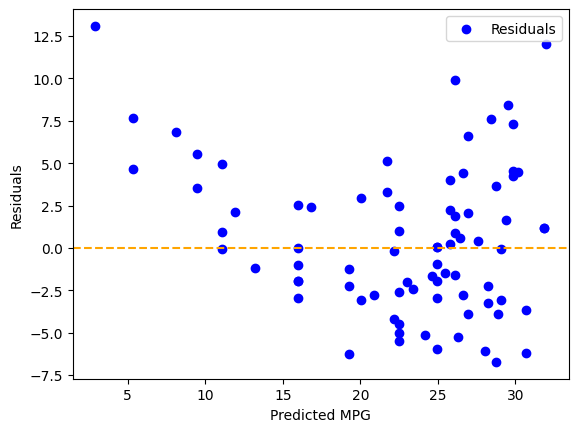

In [15]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.legend()
plt.show()

## Regresión lineal multivariable

### Análisis de los datos

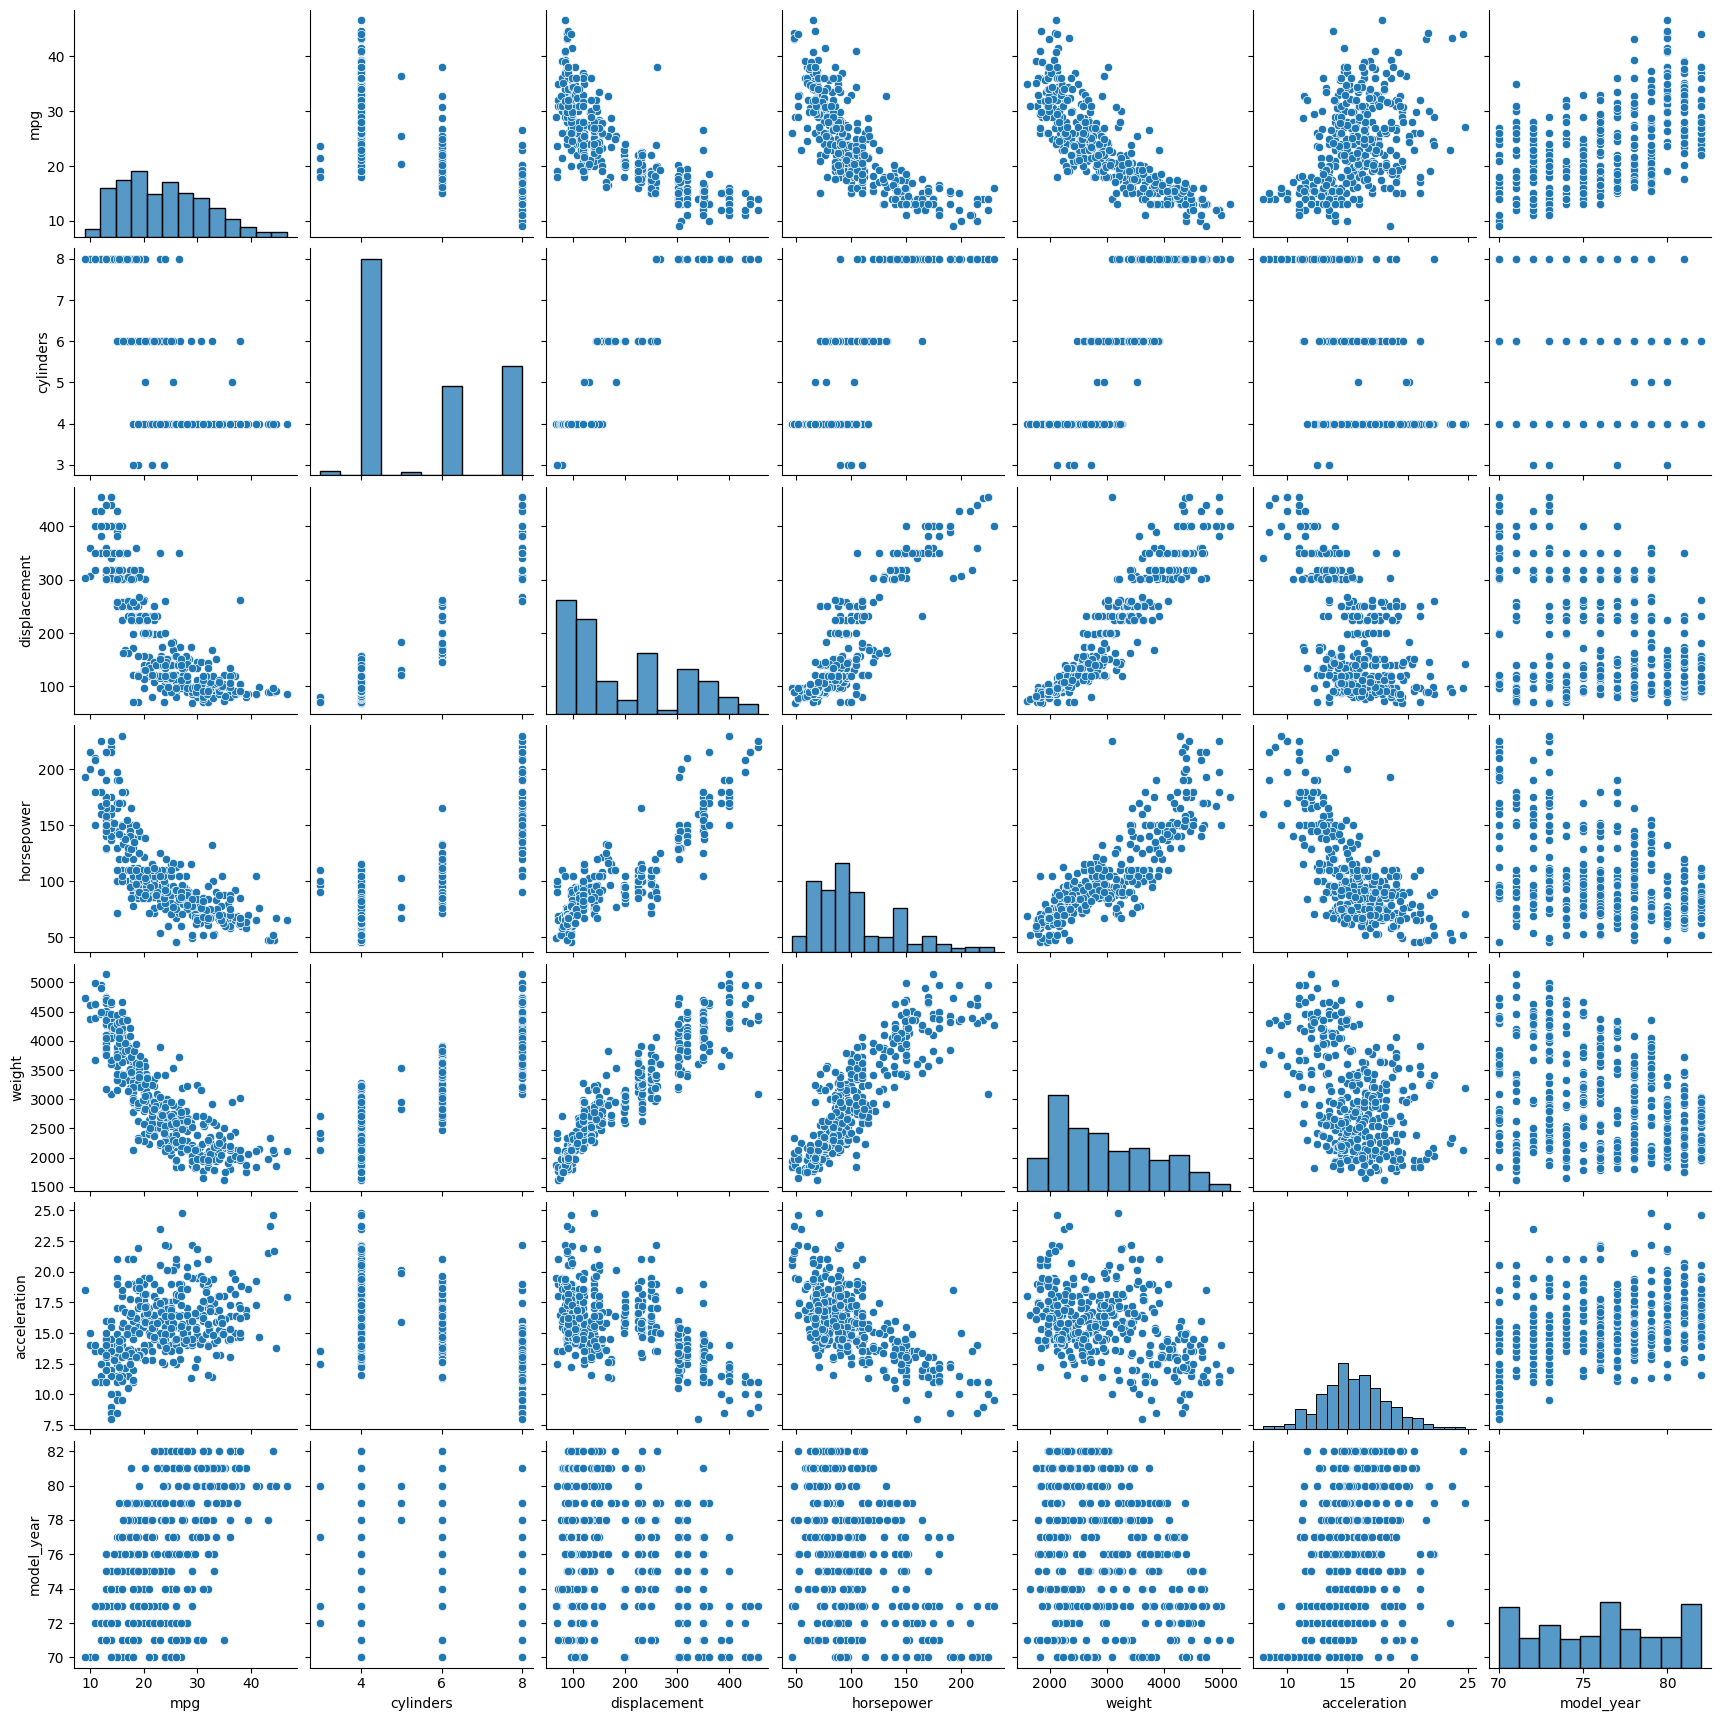

In [16]:
# Hagamos el pair plot
sns.pairplot(data);

In [17]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Limpieza y transformaciones

In [18]:
# Utilizmaos la estrageia de one-hot encoding de sklearn
from sklearn.preprocessing import OneHotEncoder

# Creamos el objeto OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Ajustamos y transformamos la columna 'origin'
data_encoded = encoder.fit_transform(data[['origin']])

# Convertimos el resultado en un DataFrame
data_encoded = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(['origin']))

# Concatenate the original data (without 'origin') and the encoded data
data = pd.concat([data.drop('origin', axis=1), data_encoded], axis=1)

In [19]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,0.0,0.0,1.0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,0.0,0.0,1.0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,0.0,0.0,1.0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,0.0,0.0,1.0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,0.0,0.0,1.0


In [20]:
# Hagamos un modelo de regresión lineal con todas las columnas
# Seleccionamos todas las columnas menos 'mpg' y 'name'
X = data.drop(['mpg', 'name'], axis=1).dropna()
y = data['mpg'].dropna()

# Reemplazamos los valores nulos por el promedio de las columnas correspondientes
X = X.fillna(X.mean())

### Partición y entrenamiento del modelo

In [21]:
# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

### Evaluación del modelo

In [22]:
# Vemos la calidad del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'R2 ajustado: {r2_adj}')

MAE: 2.287586770442106
MSE: 8.339142500255898
RMSE: 2.88775734788363
R2: 0.8449006123776617
R2 ajustado: 0.8249592625405039


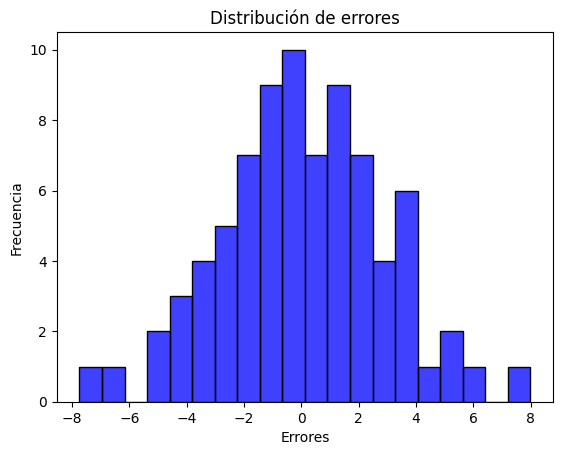

In [23]:
# Hacemos una gráfica de los errores
errors = y_test - y_pred
sns.histplot(errors, bins=20, color='blue')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores')
plt.show()

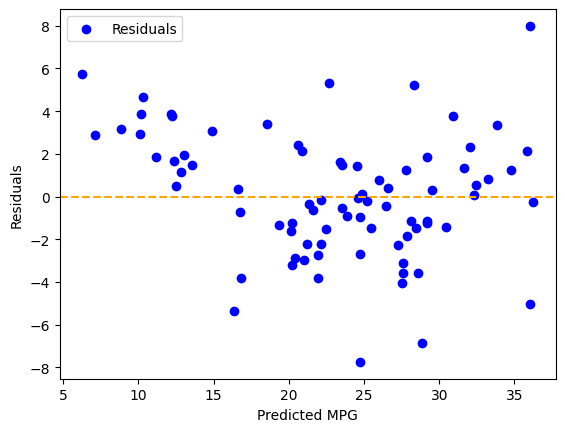

In [24]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Predicted MPG')
plt.ylabel('Residuals')
plt.legend()
plt.show()


### Análisis de coeficientes

In [25]:
# Vemos los coeficientes del modelo
coefficients = pd.DataFrame({'Coeficiente': model.coef_}, index=X.columns)
# Agregamos el intercepto
coefficients.loc['Intercepto'] = model.intercept_
coefficients

,Coeficiente
cylinders,-0.163730
displacement,0.019584
horsepower,-0.013345
weight,-0.007073
acceleration,0.073350
model_year,0.827397
origin_europe,1.075196
origin_japan,0.788853
origin_usa,-1.864049
Intercepto,-20.202660


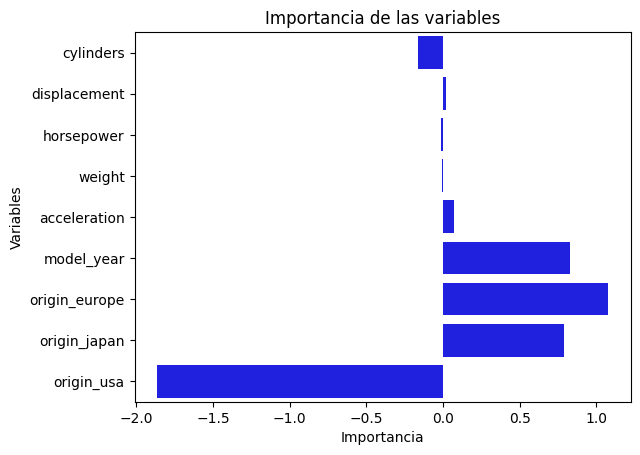

In [26]:
# Analizamos la importancia de las variables
importance = model.coef_
features = X.columns
sns.barplot(x=importance, y=features, color='blue')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables')
plt.show()

In [27]:
# Creamos un nuevo caso ficticio para probar nuestro modelo
carro_1 = pd.DataFrame({
    'cylinders': [4],
    'displacement': [100],
    'horsepower': [80],
    'weight': [2000],
    'acceleration': [20],
    'model_year': [70],
    'origin_europe': [1],
    'origin_japan': [0],
    'origin_usa': [0]
})
# Es decir, un carro con 4 cilindros, 100 de desplazamiento, 80 de caballos de fuerza, 2000 de peso, 20 de aceleración, modelo 70 y origen europeo

# Hacemos la predicción
mpg_pred = model.predict(carro_1)
print(f'MPG predicho: {mpg_pred[0]:.2f}')

MPG predicho: 26.35


In [28]:
# Podemos obtener el mismo valor (predicción) usando los coeficientes y el intercepto
mpg_pred_manual = model.intercept_ + (model.coef_ * carro_1.values).sum()
print(f'MPG predicho (manual): {mpg_pred_manual:.2f}')

MPG predicho (manual): 26.35


# Ejemplo con otros datos

### TODO
Utiliza el conjunto de datos `salary_2024.csv`, del cual tendrás que hacer una visualziación y transformación de los datos (recuerda documentar todas tus decisiones de limpieza y transformación, así como tus hallazgos). Una vez terminado ese proceso, tendrás que entrenar un modelo de regresión lineal multivariable, que a partir de todas las columnas tendrás que predecir el salario en dólares (`salary_in_usd`), es posible que tengas que eliminar el salario en otra moneda.

Finalmente crea un par de casos/ejemplos nuevos de personas ficticias, utiliza tu modelo para predecir. Qué puedes decir de los resultados, ¿era lo que esperabas? ¿por qué?